## COLLAGE PLACEMENT PREDICTION 

Placements hold great importance for students and educational institutions. This project focuses on a system that predicts if a student would be placed or not based on the student’s qualifications, historical data, and experience. This predictor uses a machine-learning algorithm to give the result. 

### Libraries imported here are :-

NumPy - NumPy is a Python library used for working with arrays which has functions for working in domain of linear algebra, fourier transform, and matrices.

Pandas - pandas is Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

Matplotlib - It is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Making Of DataFrame

#### To read the dataset that we are going to use for the analysis and then checking the dataset.

In [2]:
df= pd.read_csv('placement.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

#### This dataset contains 13 Columns and 251 records in which there are no null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### The columns property returns the label of each column in the DataFrame.

In [4]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

#### The describe() method returns description of the data in the DataFrame. 

#### DataFrame contains numerical data, the description contains information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


#### The function dataframe. isnull(). sum(). sum() returns the number of missing values in the dataset.

In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

##### No missing values are present here 

### Now we will drop the columns that are not needed.

#### dropping the serial number and salary column.

In [7]:
df = df.drop('sl_no', axis=1)
df = df.drop('salary', axis=1)

In [8]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


## Exploratory Data Analysis (EDA)

#### We have used count plot here
where the status of male and female is shown whether they are placed or not where the ratio of male is more


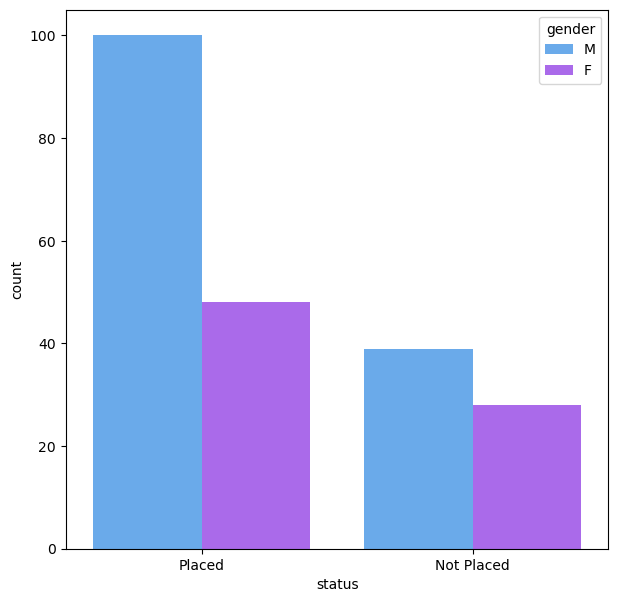

In [9]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='status',hue='gender',palette='cool')
plt.show()

#### here we have found the relation between various features using Heatmap

In [10]:
corr=df.corr()

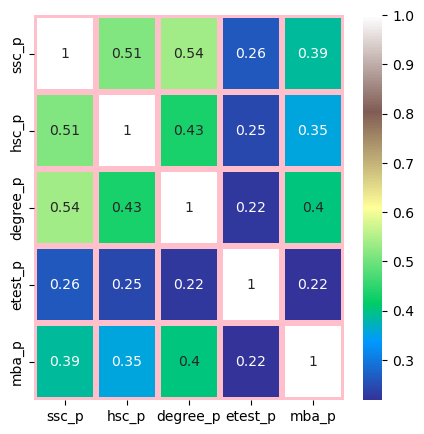

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap='terrain',linewidth=4,linecolor='pink',cbar=True)
plt.show()

#### Here we have plotted pie chart where we have shown percentage of placed and not placed students. Here number of students placed is more.

<function matplotlib.pyplot.show(close=None, block=None)>

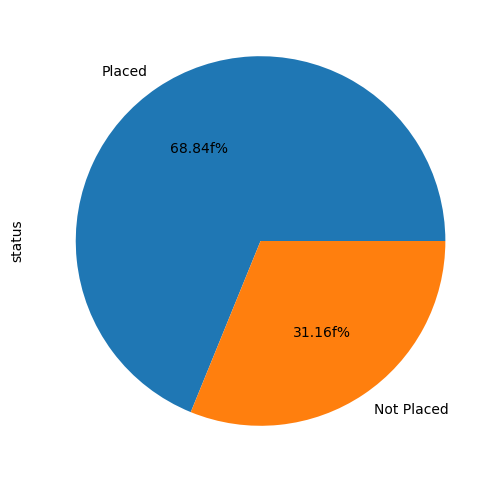

In [12]:
plt.figure(figsize=(6,6))
df['status'].value_counts().plot.pie(autopct="%1.2ff%%")
plt.show

## Preproccessing and transformation Data

### For transformation data we need to change datatypes of few columns.
For that, we will use astype() method on that columns and change the datatype to category.

In [13]:
df["gender"] = df["gender"].astype('category')
df["ssc_b"] = df["ssc_b"].astype('category')
df["hsc_b"] = df["hsc_b"].astype('category')
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')
df["hsc_s"] = df["hsc_s"].astype('category')
df.dtypes

gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
dtype: object

#### Now lets apply codes on some of these columns to convert their text values to numerical values.

In [14]:
df["gender"] = df["gender"].cat.codes
df["ssc_b"] = df["ssc_b"].cat.codes
df["hsc_b"] = df["hsc_b"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["workex"] = df["workex"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes
df["hsc_s"] = df["hsc_s"].cat.codes
 


In [15]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


#### Now to split the dataset into features and values we will be using iloc() function

In [16]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [17]:
X

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [18]:
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int8)

#### To check the efficiency of Dataset we will split the dataset into train and test data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=1)
 

In [21]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [22]:
#insights

## Hypertunning and using solver parameter

#### Now we need to train our model for which we will need to import a file, and then we will create a classifier using sklearn module. Then we will check the accuracy of the model.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train, Y_train)

In [25]:
clf.score(X_test, Y_test)

0.8837209302325582

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
lr = LogisticRegression(solver='saga')
lr.fit(X_train,Y_train)
ypred = lr.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        15
           1       0.00      0.00      0.00        28

    accuracy                           0.35        43
   macro avg       0.17      0.50      0.26        43
weighted avg       0.12      0.35      0.18        43



#### Once we have trained the model, we will check it giving some random values.

In [27]:
clf.predict([[0, 87, 0, 95, 0, 2, 78, 2, 0, 0, 1, 0]])

array([1], dtype=int8)

In [28]:
Y_pred = clf.predict(X_test)

In [29]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

#### Finally, we have y_pred, so we can generate the confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
 

In [31]:
print(confusion_matrix(Y_test, Y_pred))
 

[[15  0]
 [28  0]]


In [32]:
print(accuracy_score(Y_test, Y_pred))

0.3488372093023256


#### Random forest algorithm is an ensemble learning technique combining numerous classifiers to enhance a model's performance.

#### To find the accuracy we need to import RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
ypred=rf.predict(X_test)
cr2=classification_report(Y_test,Y_pred)
print(f"classification report{cr2}")

classification report              precision    recall  f1-score   support

           0       0.35      1.00      0.52        15
           1       0.00      0.00      0.00        28

    accuracy                           0.35        43
   macro avg       0.17      0.50      0.26        43
weighted avg       0.12      0.35      0.18        43



## Boosting

#### Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. 

### AdaBoost, also called Adaptive Boosting, is a technique in Machine Learning used as an Ensemble Method.

#### To find the accuracy we need to import AdaBoostClassifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
ypred=ada.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        15
           1       0.00      0.00      0.00        28

    accuracy                           0.35        43
   macro avg       0.17      0.50      0.26        43
weighted avg       0.12      0.35      0.18        43



### Gradient Boosting

#### Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent.

#### To find the accuracy we need to import GradientBoostingClassifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
ypred=gb.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        15
           1       0.00      0.00      0.00        28

    accuracy                           0.35        43
   macro avg       0.17      0.50      0.26        43
weighted avg       0.12      0.35      0.18        43



## XGBoost

#### XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models.

#### To find the accuracy we need to import  XGBClassifier

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
ypred=xgb.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        15
           1       0.00      0.00      0.00        28

    accuracy                           0.35        43
   macro avg       0.17      0.50      0.26        43
weighted avg       0.12      0.35      0.18        43

